# Pases del transpilador

En este NoteBook vamos a profundizar en el uso del Pass Manager. En concreto vamos a construir un Pass Manager con un único pase, el pase BasicSwap, y lo vamos a aplicar a un circuito. 


In [1]:
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_gate_map

#Elijo como backend el computador ibm_kyoto
provider=IBMProvider()
backend=provider.get_backend("ibm_kyoto")

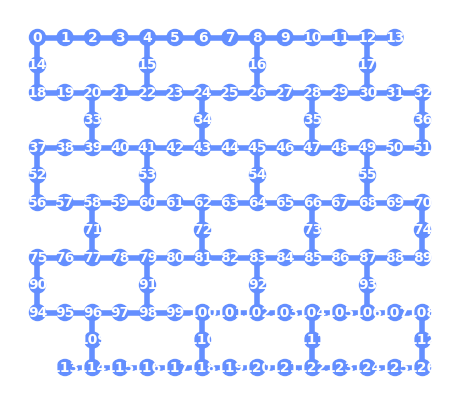

In [3]:
plot_gate_map(backend,figsize=[10,5])

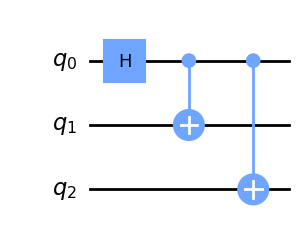

In [4]:
from qiskit import QuantumCircuit

#Creo un circuito de 3 qubits y lo dibujo
qc=QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

Ejecuto sobre el circuito el pase de enrutamiento BasicSwap. Vemos que se introduce una puerta SWAP para tratar con la falta de conexión de los qubits 0 y 2 en el backend kyoto.

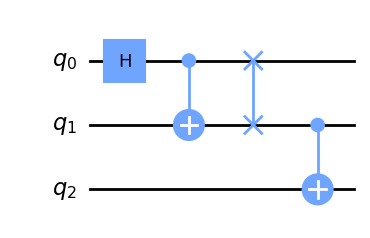

In [5]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import BasicSwap

#Incluimos el pase BasicSwap en nuestro Pass Manager
pm=PassManager(BasicSwap(backend.coupling_map))
#Lo aplicamos sobre el circuito
bs_qc=pm.run(qc)
#Dibujamos el circuito resultante
bs_qc.draw()

In [6]:
import qiskit.tools.jupyter
%qiskit_version_table